In [1]:
import wikipedia
import igraph
import json
import unidecode

In [2]:
class WikipediaGraph(igraph.Graph):
    def __init__(self, start_page, levels=1, links_per_page=10):
        super().__init__()
        self.start_page = start_page
        self.levels = 0
        self.unicode_errors = []
        self.links_per_page = links_per_page
        while self.levels < levels:
            self.add_level()
            

    def add_level(self):
        if self.levels == 0:
            self.map_vertex(self.start_page)
        else:
            unmapped_vertices = igraph.VertexSeq(self).select(is_mapped=False)[:]
            print(unmapped_vertices.indices)
            for v in unmapped_vertices:
                print(v)
                self.map_vertex(v["name"])
        
        self.levels += 1
    
    def is_page_in_graph(self, page_name):
        """
            Checks whether a page named "page_name" is in the graph
        """
        page_vertex = None
        try:
            page_vertex = self.vs.find(name=page_name)
            return True
        except ValueError:
            return False
        
    def is_page_mapped(self, page_name):
        """
            Checks whether page "page_name" has been mapped
        """
        if self.is_page_in_graph(page_name) == False:
            return False
        if self.vs.find(name=page_name)["is_mapped"] == False:
            return False
        return True
    
    def map_vertex(self, page_name):
        page_link_count = 1
        
        page = None
        try:
            page = wikipedia.page(page_name)
        except (wikipedia.DisambiguationError, wikipedia.PageError) as e:
            print(page_name)
            return
        print(page_name)
        page_links = map(lambda x: unidecode.unidecode(x), page.links)
    
        # if page isn't in graph
        if self.is_page_in_graph(page_name) == False:
            vertex = self.add_vertex(name = page_name) # add the page to the graph
            vertex["is_mapped"] = True
            vertex["level"] = self.levels
            for link in page_links:
                if page_link_count > self.links_per_page:
                    break
                page_link_count += 1
                
                if self.is_page_in_graph(link) == False: # if the target page isn't already in the graph
                    link_vertex = self.add_vertex(name = link)
                    link_vertex["is_mapped"] = False
                    link_vertex["level"] = self.levels + 1

                self.add_edge(page_name, link) # connectes the source and target pages
        
        # if page is in graph but hasn't been mapped
        elif self.is_page_in_graph(page_name) == True and self.is_page_mapped(page_name) == False:
            self.vs.find(name = page_name)["is_mapped"] = True
            for link in page_links:
                if page_link_count > self.links_per_page:
                    break
                page_link_count += 1
                
                if self.is_page_in_graph(link) == False: # if the target page isn't already in the graph
                    link_vertex = self.add_vertex(name = link)
                    link_vertex["is_mapped"] = False
#                     print(link_vertex["name"])
#                     print(self.levels)
                    link_vertex["level"] = self.levels + 1
                    
                self.add_edge(page_name, link) # connectes the source and target pages
            
        # if the page is in the graph and has been mapped
        else:
            return
    
    def write(self):
        page_name = self.start_page.replace(" ", "_")
        file_name = "static/data/{}_v_{}_e_{}.json".format(page_name, self.vcount(), self.ecount())
        graph_json = {}
        graph_json["nodes"] = []
        graph_json["links"] = []
        for i, vertex in enumerate(g.vs):
            if i == 0: # change the group so the node is a different color
                graph_json["nodes"].append({"id": vertex["name"], "group": vertex["level"]})
            else:
                graph_json["nodes"].append({"id": vertex["name"], "group": vertex["level"]})
        for edge in g.es:
            graph_json["links"].append({"source": g.vs[edge.source]["name"],
                                       "target": g.vs[edge.target]["name"],
                                       "value": 1})
        # print(json.dumps(graph_json, indent=1))

        with open(file_name, "w") as f:
            json.dump(graph_json, f)
            
    def plot(self):
        visual_style = {}
        visual_style["vertex_label"] = self.vs["name"]
        visual_style["layout"] = self.layout("fr")
        visual_style["margin"] = 50

        return igraph.plot(self, **visual_style)
        
    def _check_result(self, search_query, search_result):
        print(type(search_query))
        print(type(search_result))
        if(search_query.lower() == search_result.lower()):
            return True
        else:
            return False

In [3]:
g = WikipediaGraph("Quantum Mechanics", levels=3)

Quantum Mechanics
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 1, {'name': 'A. Douglas Stone', 'is_mapped': False, 'level': 1})
A. Douglas Stone
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 2, {'name': 'Abdus Salam', 'is_mapped': False, 'level': 1})
Abdus Salam
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 3, {'name': 'Abraham Pais', 'is_mapped': False, 'level': 1})
Abraham Pais
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 4, {'name': 'Absolute zero', 'is_mapped': False, 'level': 1})
Absolute zero
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 5, {'name': 'Accuracy', 'is_mapped': False, 'level': 1})
Accuracy
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 6, {'name': 'Acoustics', 'is_mapped': False, 'level': 1})


/home/user/Developer/active/wikimap/env/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/user/Developer/active/wikimap/env/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Acoustics
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 7, {'name': 'Acta Physica Polonica B', 'is_mapped': False, 'level': 1})
Acta Physica Polonica B
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 8, {'name': 'Action at a distance', 'is_mapped': False, 'level': 1})
Action at a distance
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 9, {'name': 'Action principle', 'is_mapped': False, 'level': 1})
Action principle
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 10, {'name': 'Adrian Kent', 'is_mapped': False, 'level': 1})
Adrian Kent
[2, 6, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f7a09739c70>, 2, {'name': 'Abdus Salam

In [4]:
g.write()

In [ ]:
for vertex in g.vs:
    print(vertex)

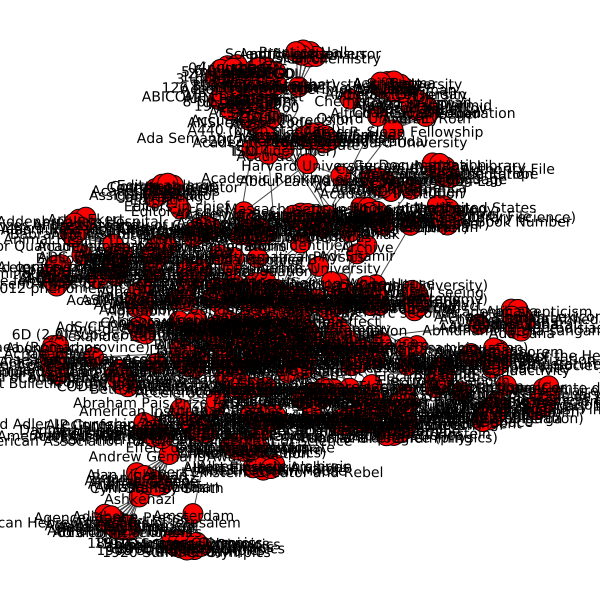

In [5]:
g.plot()

In [9]:
print(g.summary())
print(g.vcount())
print(g.ecount())

IGRAPH UN-- 11 10 -- 
+ attr: is_mapped (v), level (v), name (v)
11
10


In [15]:
current_vertices = igraph.VertexSeq(g).select(is_mapped=False)[:]
print(current_vertices.indices)
for v in current_vertices:
    print(v)
    g.map_vertex(v["name"])
print(g.summary())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 1, {'name': 'A. Douglas Stone', 'is_mapped': False})
0
A. Douglas Stone
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 2, {'name': 'Abdus Salam', 'is_mapped': False})
1
Abdus Salam
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 3, {'name': 'Abraham Pais', 'is_mapped': False})
2
Abraham Pais
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 4, {'name': 'Absolute zero', 'is_mapped': False})
3
Absolute zero
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 5, {'name': 'Accuracy', 'is_mapped': False})
4
Accuracy
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 6, {'name': 'Acoustics', 'is_mapped': False})
5


/home/user/Developer/active/wikimap/env/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/user/Developer/active/wikimap/env/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Acoustics
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 7, {'name': 'Acta Physica Polonica B', 'is_mapped': False})
6
Acta Physica Polonica B
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 8, {'name': 'Action at a distance', 'is_mapped': False})
7
Action at a distance
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 9, {'name': 'Action principle', 'is_mapped': False})
8
Action principle
igraph.Vertex(<__main__.WikipediaGraph object at 0x7f07fac50310>, 10, {'name': 'Adrian Kent', 'is_mapped': False})
9
Adrian Kent
IGRAPH UN-- 83 90 -- 
+ attr: is_mapped (v), name (v)


In [8]:
wikipedia.search("BohrEinstein debates")

[u'Bohr\u2013Einstein debates',
 u'Bohr',
 u'Quantum (book)',
 u'Niels Bohr',
 u'List of things named after Albert Einstein',
 u'List of things named after Niels Bohr',
 u'Complementarity (physics)',
 u'Albert Einstein',
 u'Photon entanglement',
 u'Hidden variable theory']